# Parser comparison

This notebook lets you visualize side-by-side how each parser analyzes a document, and compare the resulting tables.


In [1]:
# Bootstrap and common imports
import os, sys, time
sys.path.insert(0, os.path.abspath('')) # Prefer the local version of camelot if available
import camelot

print(f"Using Camelot v{camelot.__version__} from file {camelot.__file__}.")

Using Camelot v0.8.0 from file /workspace/camelot/__init__.py.


## Select a PDF file to review

This is seeded with the unit test files for convenience.

In [2]:
kwargs = {}
data = None
# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size # test_hybrid_flag_size
# pdf_file = "health.pdf"  # test_hybrid
# pdf_file = "clockwise_table_2.pdf"

# pdf_file = "tabula/12s0324.pdf" # interesting because contains two separate tables

# pdf_file = "clockwise_table_2.pdf"  # test_hybrid_table_rotated / test_stream_table_rotated
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_hybrid_table_regions
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
pdf_file = "vertical_header.pdf"

# pdf_file, kwargs = "vertical_header.pdf", {"pages": "2"}

# pdf_file, kwargs = "PIR_Prospetto.dOfferta.pdf", {"pages": "6"}
# pdf_file = "twotables_2.pdf" # Lattice is better
# pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol
# pdf_file, kwargs = "tabula/icdar2013-dataset/competition-dataset-us/us-030.pdf", {"pages": "2"}  # test_lattice
# pdf_file, kwargs = "background_lines_1.pdf", {"process_background": True}  # test_lattice_process_background

filename = os.path.join(
    os.path.dirname(os.path.abspath('.')),
    "workspace/tests/files",
    pdf_file
)

print(filename)


/workspace/tests/files/vertical_header.pdf


In [3]:
FLAVORS = ["stream", "lattice", "network", "hybrid"]
tables_parsed = {}
parses = {}
max_tables = 0
for idx, flavor in enumerate(FLAVORS):
    timer_before_parse = time.perf_counter()
    error, tables = None, []
    try:
        tables = camelot.read_pdf(filename, flavor=flavor, debug=True, **kwargs)
    except ValueError as value_error:
        error = f"Invalid argument for parser {flavor}: {value_error}"
        print(error)
    timer_after_parse = time.perf_counter()
    max_tables = max(max_tables, len(tables))

    parses[flavor] = {
        "tables": tables,
        "time": timer_after_parse - timer_before_parse,
        "error": error
    }

    print(f"##### {flavor} ####")
    print(f"Found {len(tables)} table(s):")
    for idx, table in enumerate(tables):
        flavors_matching = []
        for previous_flavor, previous_tables in tables_parsed.items():
            for prev_idx, previous_table in enumerate(previous_tables):
                if previous_table.df.equals(table.df):
                    flavors_matching.append(
                        f"{previous_flavor} table {prev_idx}")
        print(f"## Table {idx} ##")
        if flavors_matching:
            print(f"Same as {', '.join(flavors_matching)}.")
        else:
            display(table.df)
            print("")
    tables_parsed[flavor] = tables


##### stream ####
Found 1 table(s):
## Table 0 ##


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Alcona,963,439,Brian Calley\n55,Patrick Colbeck\n26,Jim Hines\n47,Bill Schuette\n164,John James\n173,Sandy Pensler\n111,,...,,Al Scully\n271,,Daniel G. Gauthier\n224,Craig M. Clemens\n76,Craig Johnston,,Adam Brege,David Bielusiak,
1,Caledonia,923,393,40,23,45,158,150,103,,...,,244,,139,143,,,,,
2,Curtis,1026,349,30,30,25,102,95,84,,...,,157,,,,,,,,
3,Greenbush,1212,423,56,26,40,126,104,131,,...,,208,,,,,208,,,
4,Gustin,611,180,22,35,17,55,73,45,,...,,109,,,,,,81,42,
5,Harrisville,1142,430,45,90,29,101,155,94,,...,,226,,,,232,,,,
6,Hawes,884,293,38,36,27,109,121,84,,...,,184,,,,,,118,87,
7,Haynes,626,275,31,20,32,104,121,53,,...,,152,,,,76,,69,31,
8,Mikado,781,208,19,39,17,81,90,63,,...,,143,,,,,113,,,
9,Millen,353,139,7,16,13,38,49,19,,...,,62,,,,,,,,



##### lattice ####
Found 1 table(s):
## Table 0 ##


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,,,STATE,,,,CONGRESSIONAL,,,,...,,COUNTY,,County Commissioner,,,,,,
1,,,Governor,,,,U.S. Senator,,,Congress-\n1st Dist,...,,Road \nCommission,,District #1,,Distri\nct #2,Dist \n#3,Dist #4,,Dist \n#5
2,Number of Registered voters,Poll Book Totals,Brian Calley,Patrick Colbeck,Jim Hines,Bill Schuette,John James,Sandy Pensler,,Jack Bergman,...,,Al Scully,,Daniel G. Gauthier,Craig M. Clemens,Craig Johnston,Carolyn Brummund,Adam Brege,David Bielusiak,
3,963,439,55,26,47,164,173,111,,268,...,,271,,224,76,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,923,393,40\n23\n45\n158,,,,150\n103,,,244,...,,244,,139,143,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,1026,349,30\n30\n25\n102,,,,95\n84,,,159,...,,157,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,
9,1212,423,56\n26\n40\n126,,,,104\n131,,,208,...,,208,,,,,208,,,



##### network ####
Found 1 table(s):
## Table 0 ##


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,...,,Reg. of,Road,,,,Distri,Dist,,
1,,,,,,,,,,,...,,Deeds,,Commission,,District #1,ct #2,#3,,Dist #4
2,,,,,,Governor,,,U.S. Senator,,...,,,,,,,,,,
3,,Number of Registered voters,Poll Book Totals,Brian Calley,Patrick Colbeck,Jim Hines,Bill Schuette,John James,Sandy Pensler,,...,Melissa A. Cordes,,Al Scully,,Daniel G. Gauthier,Craig M. Clemens,Craig Johnston,Carolyn Brummund,Adam Brege,David Bielusiak
4,Alcona,963,439,55,26,47,164,173,111,,...,269,,271,,224,76,,,,
5,Caledonia,923,393,40,23,45,158,150,103,,...,255,,244,,139,143,,,,
6,Curtis,1026,349,30,30,25,102,95,84,,...,161,,157,,,,,,,
7,Greenbush,1212,423,56,26,40,126,104,131,,...,215,,208,,,,,208,,
8,Gustin,611,180,22,35,17,55,73,45,,...,111,,109,,,,,,81,42
9,Harrisville,1142,430,45,90,29,101,155,94,,...,244,,226,,,,232,,,



##### hybrid ####
Found 1 table(s):
## Table 0 ##


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,,,,,,STATE,,,,CONGRESSIONAL,...,COUNTY,,COUNTY,,,County Commissioner,,,,
1,,,,,,,,,,,...,Reg. of,,Road,,,Distri,Dist,,,Dist
2,,,,,,,,,,,...,,Commission,,District #1,,ct #2,#3,Dist #4,,#5
3,,,,,,Governor,,,U.S. Senator,,...,,,,,,,,,,
4,,Number of Registered voters,Poll Book Totals,Brian Calley,Patrick Colbeck,Jim Hines,Bill Schuette,John James,Sandy Pensler,,...,,Al Scully,,Daniel G. Gauthier,Craig M. Clemens,Craig Johnston,Carolyn Brummund,Adam Brege,David Bielusiak,
5,Alcona,963,439,55,26,47,164,173,111,,...,,271,,224,76,,,,,
6,Caledonia,923,393,40,23,45,158,150,103,,...,,244,,139,143,,,,,
7,Curtis,1026,349,30,30,25,102,95,84,,...,,157,,,,,,,,
8,Greenbush,1212,423,56,26,40,126,104,131,,...,,208,,,,,208,,,
9,Gustin,611,180,22,35,17,55,73,45,,...,,109,,,,,,81,42,


## Show tables layout within original document

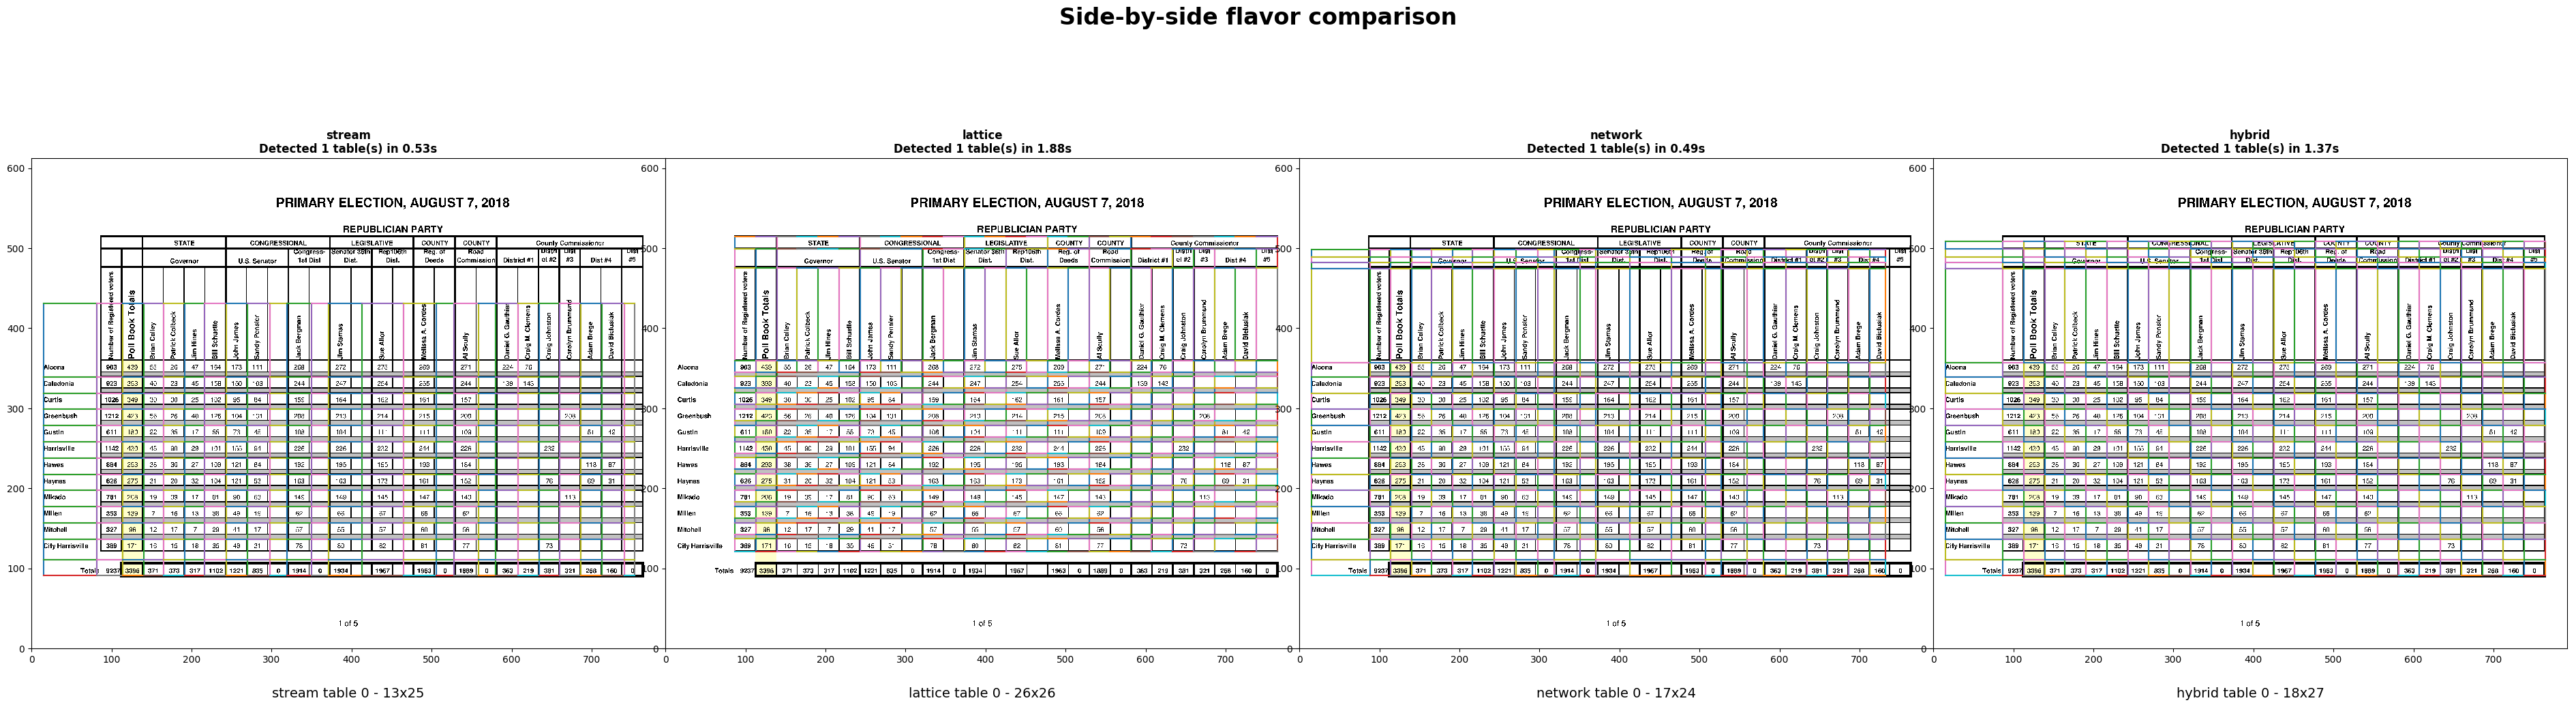

In [4]:

# Set up plotting options
import matplotlib.pyplot as plt
%matplotlib inline
PLOT_HEIGHT = 12

row_count = max(max_tables, 1)
plt.rcParams["figure.figsize"] = [PLOT_HEIGHT * len(FLAVORS), PLOT_HEIGHT * row_count]
fig, axes = plt.subplots(row_count, len(FLAVORS))
plt.subplots_adjust(wspace=0, hspace=0) # Reduce margins to maximize the display zone

fig.suptitle('Side-by-side flavor comparison', fontsize=24, fontweight='bold')
for idx, flavor in enumerate(FLAVORS):
    parse = parses[flavor]
    tables = parse["tables"]
    top_ax = axes.flat[idx]
    title = f"{flavor}\n" \
            f"Detected {len(tables)} table(s) in {parse['time']:.2f}s"
    if parse['error']:
        title = title + f"\nError parsing: {parse['error']}"
    top_ax.set_title(title, fontsize=12, fontweight='bold')
    for table_idx, table in enumerate(tables):
        if max_tables > 1:
            ax = axes[table_idx][idx]
        else:
            ax = axes[idx]
        fig = camelot.plot(table, kind='grid', ax=ax)
        ax.text(
            0.5,-0.1, 
            "{flavor} table {table_idx} - {rows}x{cols}".format(
                flavor=flavor,
                table_idx=table_idx,
                rows=table.shape[0],
                cols=table.shape[1],
            ), 
            size=14, ha="center", 
            transform=ax.transAxes
        )
        timer_after_plot = time.perf_counter()